In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds
from IPython.display import clear_output
import cv2

# Dataset

In [ ]:
emnist_ds, emnist_info = tfds.load('emnist/letters', split = 'train', with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/88800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteRGATEH/emnist-train.tfrecord*...:   0%|    …

Generating test examples...:   0%|          | 0/14800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteRGATEH/emnist-test.tfrecord*...:   0%|     …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.0.0. Subsequent calls will reuse this data.


In [ ]:
num_of_examples = emnist_info.splits['train'].num_examples
num_of_classes = emnist_info.features['label'].num_classes
print(num_of_examples)
print(num_of_classes)

88800
37


**Train/Test split from the train data**

In [ ]:
imgs = []
lbls = []
for s in emnist_ds:
  imgs.append(s['image'])
  lbls.append(s['label'])

In [ ]:
percentile_60 = int(len(imgs) * 0.6)
train_imgs = np.array(imgs[0:percentile_60])
train_lbls = np.array(lbls[0:percentile_60])
test_imgs =  np.array(imgs[percentile_60:])
test_lbls =  np.array(lbls[percentile_60:])

In [ ]:
class_names = [chr(c+64) for c in range(27)]

Custom images

In [ ]:
b3 = Image.open("/content/b3.png")
b3_array = np.array(b3)
b3_array = b3_array.reshape((b3_array.shape[0], b3_array.shape[1], b3_array.shape[2]))

In [ ]:
a1 = Image.open("/content/a1.png")
a1_array = np.array(a1)
a1_array = a1_array.reshape((a1_array.shape[0], a1_array.shape[1], a1_array.shape[2]))

In [ ]:
a2 = Image.open("/content/a2.png")
a2_array = np.array(a2)
a2_array = a2_array.reshape((a2_array.shape[0], a2_array.shape[1], a2_array.shape[2]))

In [ ]:
j1 = Image.open("/content/j1.png")
j1_array = np.array(j1)
j1_array = j1_array.reshape((j1_array.shape[0], j1_array.shape[1], j1_array.shape[2]))

In [ ]:
y1 = Image.open("/content/y1.png")
y1_array = np.array(y1)
y1_array = y1_array.reshape((y1_array.shape[0], y1_array.shape[1], y1_array.shape[2]))

In [ ]:
y2 = Image.open("/content/y2.png")
y2_array = np.array(y2)
y2_array = y2_array.reshape((y2_array.shape[0], y2_array.shape[1], y2_array.shape[2]))

In [ ]:
n1 = Image.open("/content/n1.png")
n1_array = np.array(n1)
n1_array = n1_array.reshape((n1_array.shape[0], n1_array.shape[1], n1_array.shape[2]))

In [ ]:
f1 = Image.open("/content/f1.png")
f1_array = np.array(f1)
f1_array = f1_array.reshape((f1_array.shape[0], f1_array.shape[1], f1_array.shape[2]))

Changing image dimensions from (28,28,3) to (28,28,1)

In [ ]:
def rgb_to_gray(rgb_image):
    gray_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140])
    return gray_image
def resize_image(image, target_size):
    resized_image = cv2.resize(image, target_size[:2], interpolation=cv2.INTER_LINEAR)
    resized_image = resized_image.reshape((28,28,1))
    return resized_image

In [ ]:
gray_b3 = rgb_to_gray(b3_array)
gray_a1 = rgb_to_gray(a1_array)
gray_a2 = rgb_to_gray(a2_array)
gray_j1 = rgb_to_gray(j1_array)
grab_y1 = rgb_to_gray(y1_array)
grab_y2 = rgb_to_gray(y2_array)
grab_n1 = rgb_to_gray(n1_array)
gray_f1 = rgb_to_gray(f1_array)

In [ ]:
target = (28,28,1)
b3 = resize_image(gray_b3, target)
a1 = resize_image(gray_a1, target)
a2 = resize_image(gray_a2, target)
j1 = resize_image(gray_j1, target)
y1 = resize_image(grab_y1, target)
y2 = resize_image(grab_y2, target)
n1 = resize_image(grab_n1, target)
f1 = resize_image(gray_f1, target)

In [ ]:
custom_imgs = np.array([b3, a1, a2, j1, y1, y2, n1,f1])
real = ['B','A','A','J','Y','Y','N','F']
print(custom_imgs.shape)

(8, 28, 28, 1)


In [ ]:
final_test_set = test_imgs[0: int(test_imgs.shape[0] * 0.2)]
final_test_set = np.concatenate((final_test_set, custom_imgs))

# **Convolutional Neural Network**

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(27, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
aug_data = datagen.flow(train_imgs, train_lbls)

In [ ]:
model.fit(train_imgs, train_lbls, epochs = 5)

Epoch 1/5
1665/1665 [==============================] - 93s 55ms/step - loss: 0.6923 - accuracy: 0.7898
Epoch 2/5
1665/1665 [==============================] - 85s 51ms/step - loss: 0.3472 - accuracy: 0.8869
Epoch 3/5
1665/1665 [==============================] - 85s 51ms/step - loss: 0.2892 - accuracy: 0.9040
Epoch 4/5
1665/1665 [==============================] - 85s 51ms/step - loss: 0.2552 - accuracy: 0.9120
Epoch 5/5
1665/1665 [==============================] - 85s 51ms/step - loss: 0.2298 - accuracy: 0.9210


In [ ]:
loss, acc = model.evaluate(test_imgs, test_lbls, verbose = 1)
print(acc)

1110/1110 [==============================] - 16s 14ms/step - loss: 0.2500 - accuracy: 0.9223
0.9223254323005676


In [ ]:
predictions = model.predict(test_imgs)

1110/1110 [==============================] - 15s 14ms/step


In [ ]:
pred = model.predict(custom_imgs)

1/1 [==============================] - 0s 107ms/step


In [ ]:
def play(n):
  print(f"Predicting...{class_names[np.argmax(predictions[n])]}")
  plt.figure(figsize = (1,1))
  plt.imshow(test_imgs[n], cmap='gray')
  plt.colorbar()
  plt.grid(False)
  plt.show()


In [ ]:
def play2(n):
  print(f"Predicting...{class_names[np.argmax(pred[n])]}")
  plt.figure(figsize = (1,1))
  plt.imshow(custom_imgs[n], cmap='gray')
  plt.colorbar()
  plt.grid(False)
  plt.show()


Predicting...B


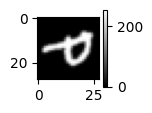

In [ ]:
import random
play(random.randint(0,test_imgs.shape[0]))

In [ ]:
def play3():
  if len(real) != custom_imgs.shape[0]:
    print("Something is wrong")
    return
  for i in range(custom_imgs.shape[0]):
    print(f"{real[i]} {class_names[np.argmax(pred[i])]}")

In [ ]:
play3()

B B
A A
A F
J M
Y K
Y Y
N W
F J


In [ ]:
custom_imgs.shape[0]

In [ ]:
p

TypeError: ignored